
## Projecte creat pels autors de les jornades IAxFP. 

<a href="https://sites.google.com/xtec.cat/jornadaai/inici">Website Jornades Inteligència Artificial a la FP</a>

### Com provar-lo ? 

Si teniu l'[entorn del curs](../Sessi%C3%B31_PreparacioEntorn/readme.md) instal.lat podeu fer proves en local amb el fitxer *.IPYNB

L'altre opció és usar el fitxer en servidor de Google Colab:

<a href="https://colab.research.google.com/github/miquelamorosaldev/dawbio2-m14-bioinformatica-uf1-uf2/blob/main/A01_JornadesIAXFP_WineQuality/Wine_Quality_Amor%C3%B3s_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Fitxers de dades necessaris.

[winequality-white.csv](winequality-white.csv)

[winequality-white-nan.csv](winequality-white-nan.csv)

#Machine Learning
Capacidad del sistema para identificar una gran serie de patrones complejos determinados por una gran cantidad de parámetros.
<figure>
  <img src= "https://miro.medium.com/max/1152/0*zRc3gOev20t1przG.jpg" alt= "Trulli" stype= "width:100%">
  <figcaption align = "center">
  </figure>


### Importamos librerias y datos

Importamos las librerias necesarias para todo el proyecto


Importamos de nuestro ordenador los datasets que usaremos, únicamente deberemos importarlo como un archivo común. Si clicamos en la carpeta que aparece en la izquierda de la pantalla veremos los archivos y sus nombres correspondientes


In [2]:
import io
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
import matplotlib
from sklearn import tree
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import AdaBoostClassifier
import numpy as np
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#version sin Nan
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white.csv


In [5]:
# Guardem el fitxer, sense valors NaN, en un Datadrame de Pandas.
df = pd.read_csv(io.BytesIO(uploaded['winequality-white.csv']),delimiter=';')


In [6]:
#Version con Nan
from google.colab import files
uploaded = files.upload()

Saving winequality-white_nan.csv to winequality-white_nan.csv


In [ ]:
# Guardem el fitxer, amb valors NaN, en un Datadrame de Pandas.
df_nan = pd.read_csv(io.BytesIO(uploaded['winequality-white_nan.csv']),delimiter=';')

### Comprensión de los datos con los que trabajamos
<figure>
  <img src= "https://img.huffingtonpost.com/asset/5cd3830a2100005800d3d72d.jpeg?ops=scalefit_720_noupscale" width= "400"">
  <figcaption align = "center">
  </figure>

In [8]:
#Lo primero de todo visualizar unas cuantas filas del dataset que tenemos
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [37]:
#Necesitamos conocer con cuantos datos estamos trabajando
df.shape

#shape retorna les files i columnes del dataFrame.

(4898, 12)

In [36]:
#Buscamos las diversas clases que tenemos, es decir cuantos tipos quality distintos tenemos
unique_values = df.quality.unique()
unique_values.sort()
print(unique_values)

[3 4 5 6 7 8 9]


In [35]:
'''Comprovamos cuantas filas tenemos de cada clase. Nos sirve para asegurarnos de que no
haya ningún desbalanceo en los datos'''
print("Quality 3 ",df[df.quality == 3].shape[0])
print("Quality 4 ",df[df.quality == 4].shape[0])
print("Quality 5 ",df[df.quality == 5].shape[0])
print("Quality 6 ",df[df.quality == 6].shape[0])
print("Quality 7 ",df[df.quality == 7].shape[0])
print("Quality 8 ",df[df.quality == 8].shape[0])
print("Quality 9 ",df[df.quality == 9].shape[0])

Quality 3  20
Quality 4  163
Quality 5  1457
Quality 6  2198
Quality 7  880
Quality 8  175
Quality 9  5


**Vamos a mostrar la lista de los 5 vinos de calidad 9. Con pandas es muy fácil.**

In [17]:

df[df.quality == 9]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,10.4,9
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,12.4,9
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,12.5,9
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,12.7,9
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,12.9,9


In [19]:
#Comprovamos si tenemos valores nulos
df.isnull().values.any()

False

'En esta etapa es donde hemos de interpretar los datos para averiguar si aquello que estamos visualizando es correcto o no.\nPor ejemplo, sabemos que el alchol que puede haber en una botella de vino va desde el 5% al 20%, por lo tanto con ese conocimiento previo\nsomos capaces de decir que los valores del histograma del alchol están dentro de lo esperado.\nSe haría el mismo procedimiento para el resto de datos'

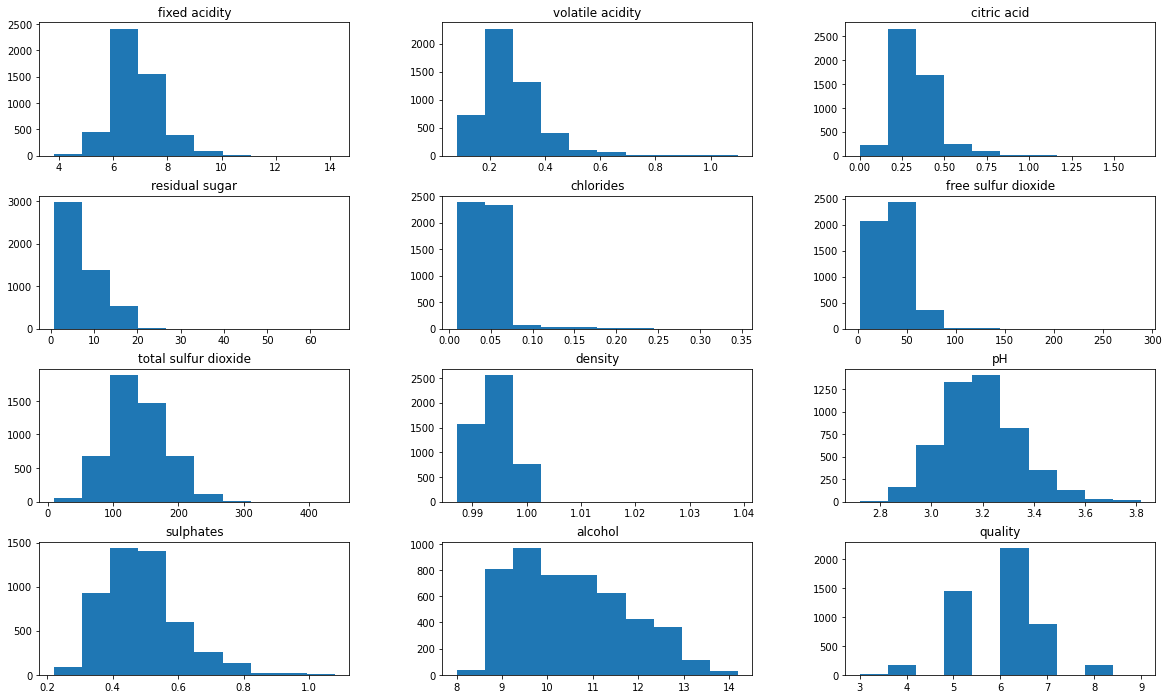

In [20]:
#Generem un histograma de cada una de les variables que defineixen el vi, gràcies a les llibreries Pandas i Matplotlib que hem importat abans,

hist = df.hist(figsize = (20,12),grid= False)

'''En esta etapa es donde hemos de interpretar los datos para averiguar si aquello que estamos visualizando es correcto o no.
Por ejemplo, sabemos que el alchol que puede haber en una botella de vino va desde el 5% al 20%, por lo tanto con ese conocimiento previo
somos capaces de decir que los valores del histograma del alchol están dentro de lo esperado.
Se haría el mismo procedimiento para el resto de datos'''

In [34]:
# La matriz de correlación nos ayuda a saber que relación tiene cada una de las variables del modelo.
# Nos interesa sobretodo saber que valores de variables estan más relacionadas con la calidad del vino.

corrMatrix = df.corr()
print (corrMatrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity              1.000000         -0.022697     0.289181   
volatile acidity          -0.022697          1.000000    -0.149472   
citric acid                0.289181         -0.149472     1.000000   
residual sugar             0.089021          0.064286     0.094212   
chlorides                  0.023086          0.070512     0.114364   
free sulfur dioxide       -0.049396         -0.097012     0.094077   
total sulfur dioxide       0.091070          0.089261     0.121131   
density                    0.265331          0.027114     0.149503   
pH                        -0.425858         -0.031915    -0.163748   
sulphates                 -0.017143         -0.035728     0.062331   
alcohol                   -0.120881          0.067718    -0.075729   
quality                   -0.113663         -0.194723    -0.009209   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

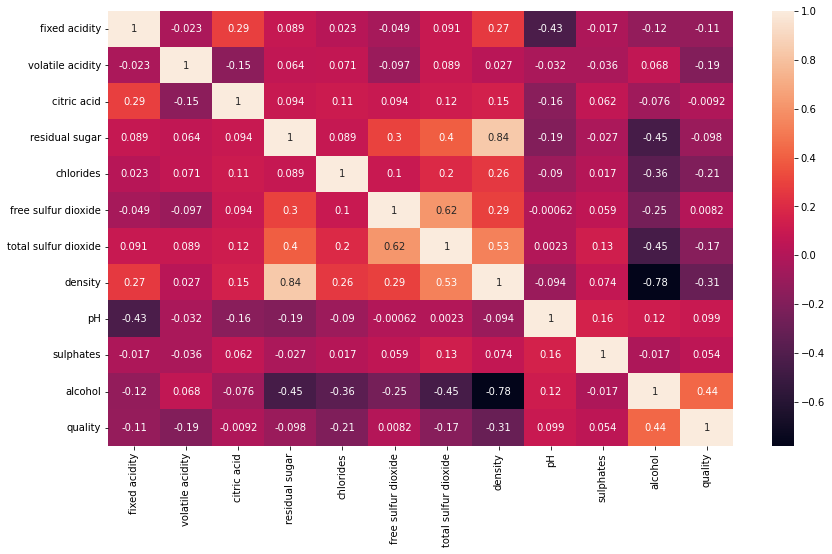

In [22]:
plt.figure(figsize=(14, 8))
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Preparamos y entrenamos el modelo

In [25]:
#Separamos las características (Features) de nuestras muestras y la columna de aquello que queremos predecir
X = df.iloc[:,:-1] #fila, columna
y = df.iloc[:,-1]

In [26]:
#De los datos que tenemos los separamos en aquellos que usaremos para entrenar y aquellos que usaremos para comprovar los resultados
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=80) #42 es problematic


In [27]:
predict = X_test.iloc[0]
correct_result = y_test.iloc[0]

In [28]:
#Eliminem la fila amb la que volem fer la predicció
X_test = X_test.iloc[1:,:]
y_test = y_test.iloc[1:]

In [29]:
X_train.size

36091

In [30]:
#Hemos escogido un modelo concreto para hacer el training, podríamos haber cojido cualquier otro
clf = DecisionTreeClassifier(random_state=0).fit(X_train,y_train)

### Post modelo
Una vez se ha implementado el modelo, nos hemos de aseguar que los resultados sean buenos antes de generalizar. Hay diversos parámetros que nos indican el comportamiento de un modelo


*   Accuracy
*   ROC AUC
*   Precision / Recall
*   F1Score
*   ...



In [31]:
print('Accuracy: ',clf.score(X_test,y_test))

Accuracy:  0.5643564356435643


####¿Porque usamos la matriz de correlación?
La accuracy es la manera más directa y sencilla de ver si el modelo acierta correctamente o no, sin embargo si tenemos una clasificación desbalanceada, es decir como hemos visto antes donde de una clase tenemos muchas más muestras que de otra, es posible que se le de muy bien acertar aquella clase que es mayoritaria, con lo que al final tendrá una accuracy muy buena porque las hace todas bien, sin embargo la clase que es minoritaria la puede fallar mucho.
Por esta razón se usan otro tipo de parámetros para evaluar nuestros resultados

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


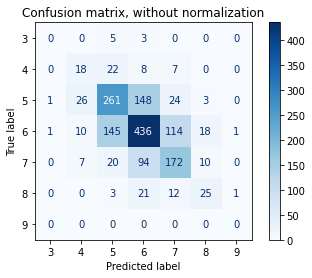

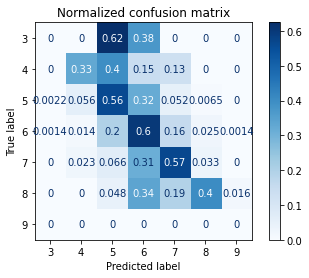

<Figure size 2160x2160 with 0 Axes>

In [38]:
unique_values_ = [str(unique_values[i]) for i in range(len(unique_values))]
import numpy as np
np.set_printoptions(precision=2)
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=unique_values_,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    #print(title)
    #print(disp.confusion_matrix)
plt.figure(figsize=(30, 30))
plt.show()

In [39]:
print('predicción: ',clf.predict(predict.to_numpy().reshape(1, -1)))
print('valor correcto: ',correct_result)

predicción:  [6]
valor correcto:  6


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


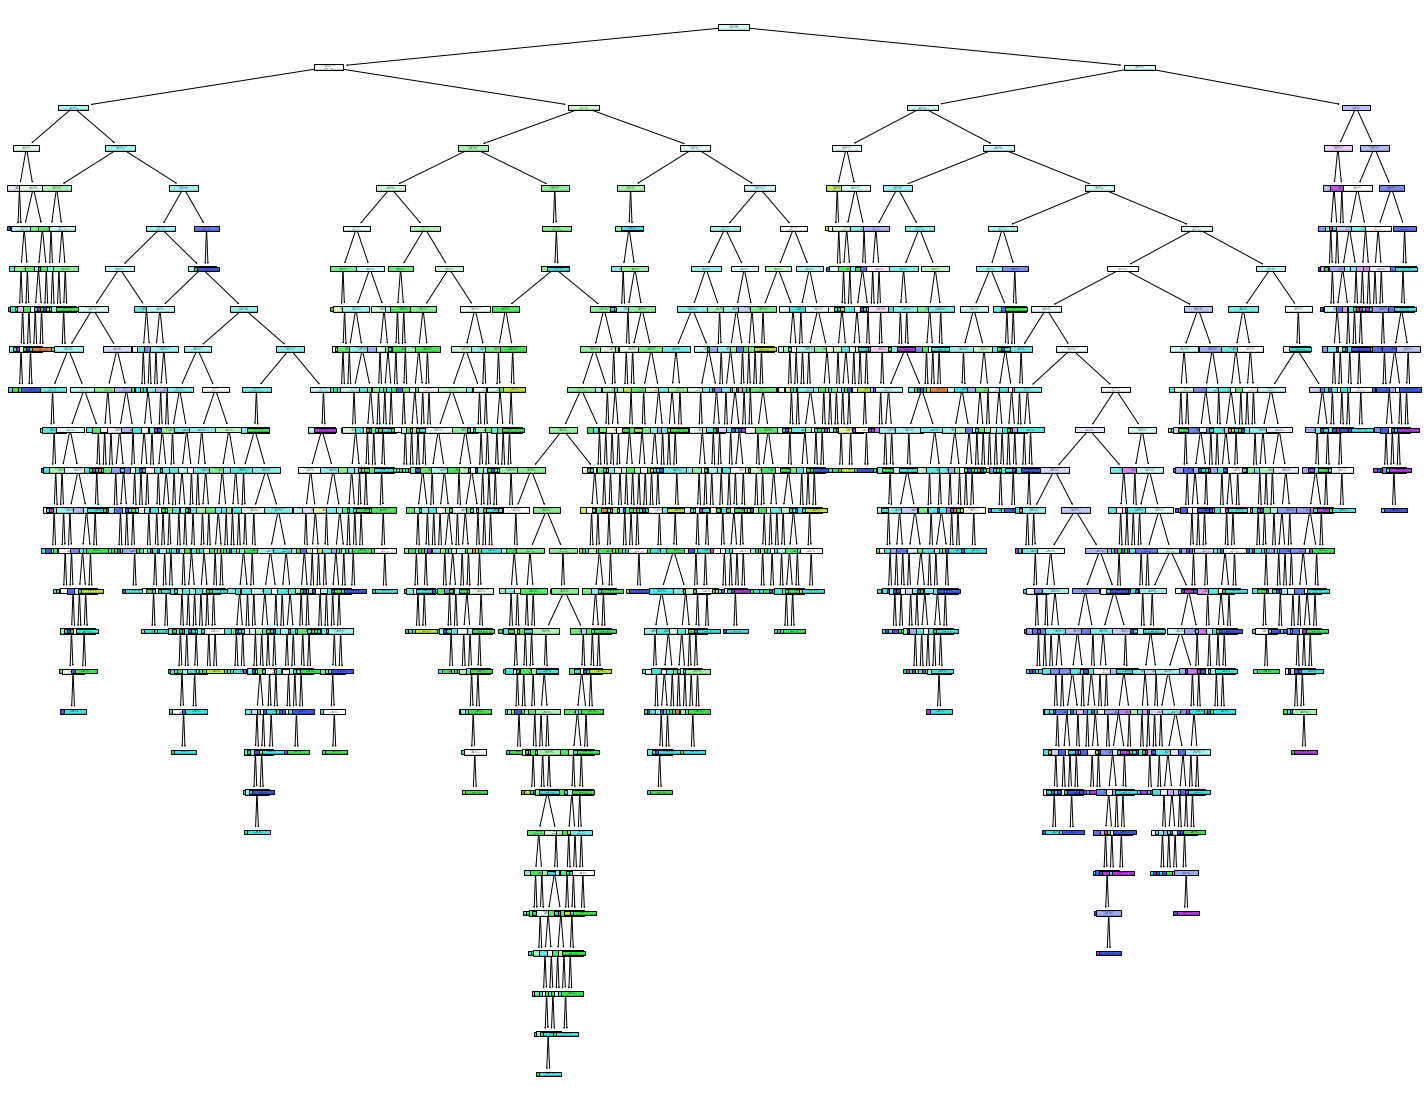

In [40]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=list(df.columns),  
                   #class_names=new,
                   #max_depth = 1,
                   proportion = True,
                   filled=True)

## Vamos a obtener mejores resultados

In [41]:
#RandomForest
RF = RandomForestClassifier(random_state=0).fit(X_train,y_train)
#SuperVectorMachine
SVM = svm.SVC(random_state=0).fit(X_train,y_train)
#Stochastic Gradient Descend
SGD = SGDClassifier(loss="hinge", penalty="l2", max_iter=5,random_state=0).fit(X_train,y_train)
#AdaBoost
AB = AdaBoostClassifier(n_estimators=100,random_state=0).fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


In [ ]:
print('Accuracy Random Forest: ',RF.score(X_test,y_test))
print('Accuracy SVM: ',SVM.score(X_test,y_test))
print('Accuracy SGD: ',SGD.score(X_test,y_test))
print('Accuracy AdaBoost: ',AB.score(X_test,y_test))

Accuracy Random Forest:  0.6596534653465347
Accuracy SVM:  0.4467821782178218
Accuracy SGD:  0.44863861386138615
Accuracy AdaBoost:  0.42326732673267325


##¿Realmente es todo tan sencillo?


Vamos a tratar diversas situaciones con las que nos podemos a encontrar y cuales son las posibilades ante ellas.


*   Nan Values: Cuando nos faltan valores
*   Correlación entre variables: tenemos dos variables que nos indican lo mismo. ¿Bueno o malo?



####**Nan**
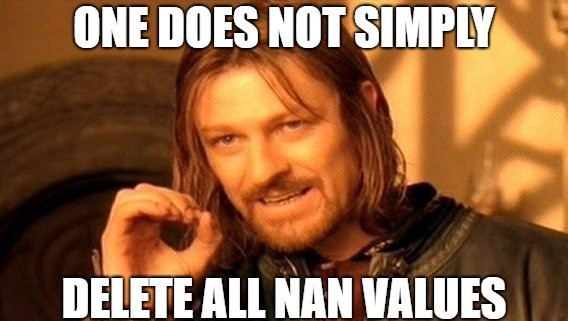


In [ ]:
df_nan.isnull().values.any()

True

In [ ]:
#comprovamos que columnas son las afectadas y las estudiamos.
df_nan.isna().sum()

fixed acidity            8
volatile acidity        19
citric acid             14
residual sugar          20
chlorides               20
free sulfur dioxide     13
total sulfur dioxide    13
density                 11
pH                      21
sulphates               19
alcohol                 18
quality                  0
dtype: int64

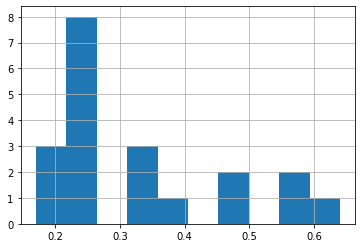

In [ ]:
''' No sabemos que clase de relación hay entre cada una de estas variables que tenemos como características
y la calidad del vino. Sin embargo podemos hacer una hipótesis: Lo más probable esque los vinos con la misma
calidad tengan similares características"
Por lo tanto a la hora de decidir que hacer con estos Nan los agruparemos por clases. 
Comprovamos con los histogramas si es cierto que ciertas variables dependan de la clase'''
quality_3 = df[df.quality == 3]
quality_4 = df[df.quality == 4]
quality_5 = df[df.quality == 5]
quality_6 = df[df.quality == 6]

#quality_6['volatile acidity'].hist()
#quality_5['volatile acidity'].hist()
#quality_4['volatile acidity'].hist()
quality_3['volatile acidity'].hist()


In [ ]:
#Por ejemplo en la clase 3 no hay ningún Nan...
df_nan[df_nan["quality"]== 6].isna().sum()

fixed acidity            5
volatile acidity        10
citric acid              4
residual sugar           8
chlorides               13
free sulfur dioxide      8
total sulfur dioxide     6
density                  4
pH                       6
sulphates                8
alcohol                  9
quality                  0
dtype: int64

In [ ]:
'''Que opciones tenemos cuando hay Nan?
1- Eliminar la columna
2- Eliminar las filas afectadas: puede ser bueno aunque sin embargo si tenemos pocas filas de una clase puede ser perjudicial
3- Llenarlo: puede ser con el valor medio, mediana...
4- Usar algoritmos: KNN, MICE

SyntaxError: ignored

#### **Hay distintas maneras de entrenar un modelo?**´
<figure>
  <img src= "https://miro.medium.com/max/1202/0*PGkRo2OztSOlnG9t.png" width= "400"">
  <figcaption align = "center">
  </figure>


In [ ]:
cross_val_score(clf, X_train, y_train, cv=10)


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning: The least populated class in y has only 5 members, which is less than n_splits=10.
  % (min_groups, self.n_splits)), UserWarning)


array([0.55, 0.56, 0.58, 0.57, 0.58, 0.58, 0.59, 0.54, 0.57, 0.59])

#### Overfitting

<figure>
  <img src= "https://miro.medium.com/max/1125/1*_7OPgojau8hkiPUiHoGK_w.png" width= "700"">
  <figcaption align = "center">
  </figure>

#### K-means

In [ ]:
kmeans = KMeans(n_clusters=7, random_state=0).fit(X)

In [ ]:
kmeans.cluster_centers_

array([[6.83e+00, 2.79e-01, 3.26e-01, 5.61e+00, 4.38e-02, 2.98e+01,
        1.27e+02, 9.93e-01, 3.19e+00, 4.84e-01, 1.07e+01],
       [6.89e+00, 2.81e-01, 3.54e-01, 9.41e+00, 5.14e-02, 5.37e+01,
        1.87e+02, 9.96e-01, 3.18e+00, 5.11e-01, 9.71e+00],
       [6.83e+00, 2.82e-01, 3.12e-01, 3.19e+00, 3.92e-02, 1.56e+01,
        6.88e+01, 9.92e-01, 3.17e+00, 4.69e-01, 1.12e+01],
       [7.04e+00, 3.09e-01, 3.59e-01, 1.01e+01, 5.18e-02, 5.49e+01,
        2.27e+02, 9.97e-01, 3.17e+00, 5.26e-01, 9.53e+00],
       [6.75e+00, 2.65e-01, 3.20e-01, 4.24e+00, 4.13e-02, 2.65e+01,
        1.01e+02, 9.92e-01, 3.19e+00, 4.78e-01, 1.12e+01],
       [6.75e+00, 2.54e-01, 3.46e-01, 7.53e+00, 4.77e-02, 5.02e+01,
        1.49e+02, 9.95e-01, 3.20e+00, 4.86e-01, 1.03e+01],
       [7.10e+00, 3.04e-01, 3.44e-01, 7.51e+00, 5.07e-02, 2.93e+01,
        1.66e+02, 9.95e-01, 3.19e+00, 5.00e-01, 1.01e+01]])

In [ ]:
predict

fixed acidity            8.80000
volatile acidity         0.39000
citric acid              0.35000
residual sugar           1.80000
chlorides                0.09600
free sulfur dioxide     22.00000
total sulfur dioxide    80.00000
density                  0.99016
pH                       2.95000
sulphates                0.54000
alcohol                 12.60000
Name: 3388, dtype: float64

In [ ]:
prediction_kmeans = kmeans.predict([[8.80000, 0.39000, 0.35000, 1.80000, 0.09600, 8.00000, 80.00000, 0.99016, 2.95000, 0.54000, 12.60000]])
print(prediction_kmeans)

[2]


##### De manera más visual...

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


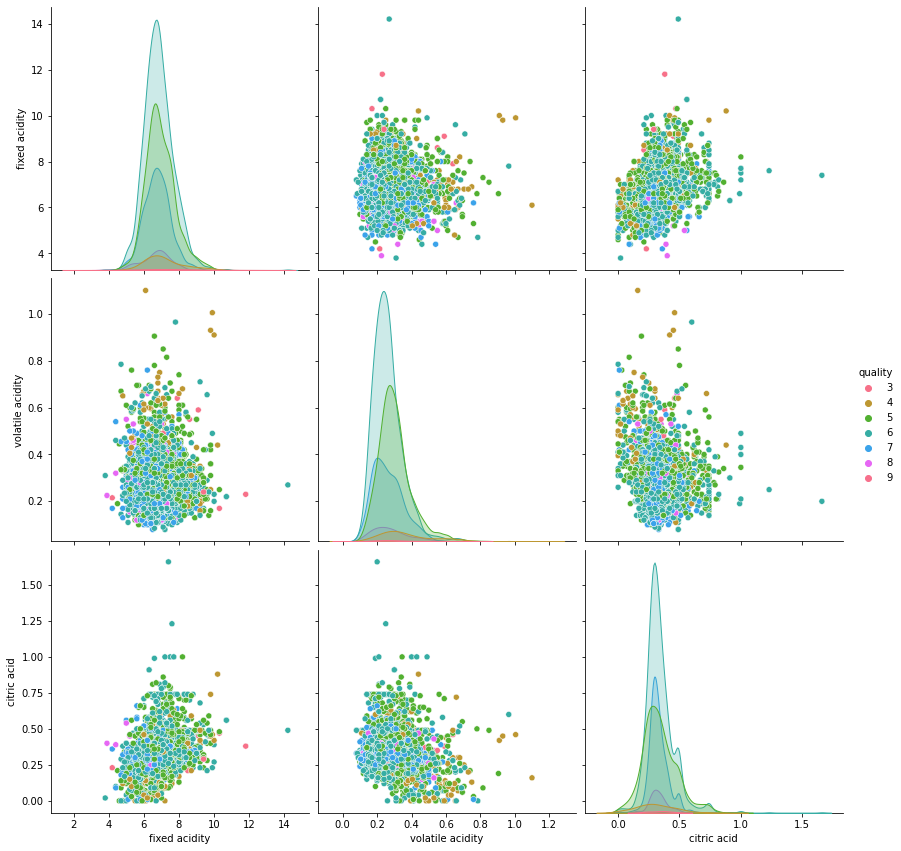

In [ ]:
sb.pairplot(df.dropna(), hue='quality',size=4,vars=['fixed acidity', 'volatile acidity', 'citric acid'],kind='scatter', palette = "husl")

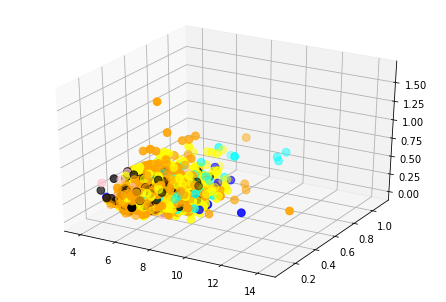

In [ ]:
X = np.array(df[['fixed acidity', 'volatile acidity', 'citric acid']])
y = np.array(df['quality'])

fig = plt.figure()
ax = Axes3D(fig)
colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)

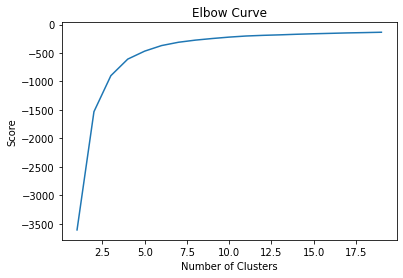

In [ ]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=7).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[5.39 0.29 0.26]
 [7.47 0.27 0.37]
 [6.53 0.28 0.33]
 [9.24 0.3  0.41]
 [6.98 0.27 0.33]
 [6.07 0.28 0.29]
 [8.1  0.28 0.38]]


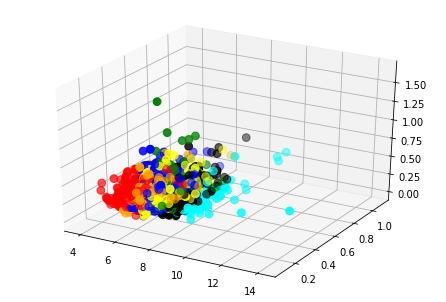

In [ ]:
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow','orange','black']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

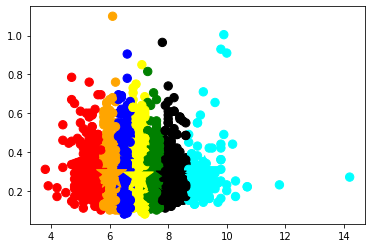

In [ ]:
# Getting the values and plotting it
f1 = df['fixed acidity'].values
f2 = df['volatile acidity'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

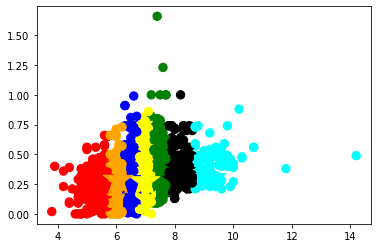

In [ ]:
# Getting the values and plotting it
f1 = df['fixed acidity'].values
f2 = df['citric acid'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

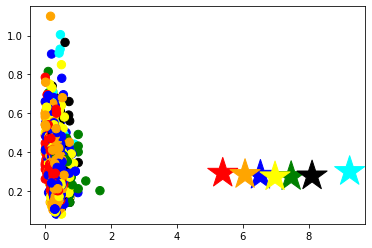

In [ ]:
# Getting the values and plotting it
f2 = df['volatile acidity'].values
f1 = df['citric acid'].values

plt.scatter(f1, f2, c=asignar, s=70)
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000)
plt.show()

In [ ]:
prediction_kmeans = kmeans.predict([[8.80000, 0.39000, 0.35000]])
print(prediction_kmeans)

[3]


**Referencias**

*   https://archive.ics.uci.edu/ml/datasets/wine+quality
*   https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/
*   https://towardsdatascience.com/understanding-feature-extraction-using-correlation-matrix-and-scatter-plots-6c19e968a60c


